<a href="https://colab.research.google.com/github/shankarfierce/MSDS_462_CV/blob/master/MSDS462CV_FashionMNIST_Demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the first assignment demo video of computer vision course to classify Fashion MNIST data which is one of the new standards for training machine learning models for image classification. The dataset contains 60000 samples for training and 10000 for testing data sets and is represented in a 28x 28 pixels associated with a label of what the cloth is. The data set is provided by Zalando. 


**Reference:**

https://cloudxlab.com/blog/fashion-mnist-using-deep-learning-with-tensorflow-keras/

Let us start with importing required libraries

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

The Fashion MNIST dataset is downloaded using Tensorflow Keras API.

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
train_images.shape

(60000, 28, 28)

We shall see that the images are represented in 28 x 28 pixel and each pixel represents a value between 0 and 255 that describes the pixel intensity.

In [15]:
train_labels.shape

(60000,)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
test_labels.shape

(10000,)

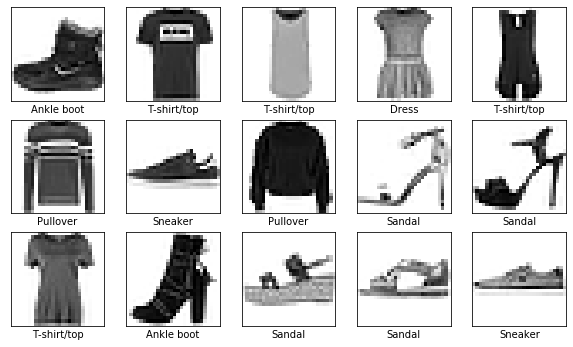

In [29]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The labels for the class as specified in the Fashion MNIST dataset are: 

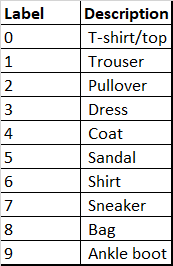

Let us inspect one of the dataset images say at index 400 as stated below. We shall clearly see that the image is a pullover and the corresponding label value is 2-pullover.

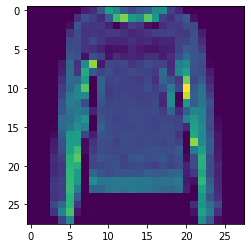

In [27]:
plt.figure()
plt.imshow(np.squeeze(train_images[400]))

In [28]:
train_labels[400]

2

One of the dimensions for the image is Channels (color) and let us add it to both training and testing dataset images with channel = 1 for it is grayscale.

Normalize the input range for the pixels between 0 and 1 by dividing the pixel value by 255 since it ranges between 0 to 255.

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [0]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

**Model Building: **


Let us design the model with 3 convolutional layers as per the configurations specified in the code, i.e. 32,64 and 128 neurons for 1st, 2nd and 3rd layer respectively with kernel size as 3x3 and activation function as Relu. We will also use the 2d version of max pooling function as the input is 2D.

In [0]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )
conv2 = layers.Conv2D(64, (3,3), activation='relu')
conv3 = layers.Conv2D(128, (3,3), activation='relu')
max_pool_1 = layers.MaxPooling2D((2,2))
max_pool_2 = layers.MaxPooling2D((2,2))
max_pool_3 = layers.MaxPooling2D((2,2))

The hidden layer expects the input in 1D and we need to convert the 2D from the previous layer to 1D before enters hidden layer in flattening layer and number of neurons must be equal to what is in the previous layer, in our case it is 128. Output layer is configured with 10 neurons for the 10 classes with softmax function.

In [0]:
flat_layer = layers.Flatten()

In [0]:
fc = layers.Dense(128, activation='relu')

In [0]:
output = layers.Dense(10, 'softmax')

In [36]:
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(train_images_norm, train_labels, epochs=5, batch_size=512, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 383s 7ms/sample - loss: 0.2686 - acc: 0.9053 - val_loss: 0.2665 - val_acc: 0.9063
Epoch 2/5
54000/54000 [==============================] - 383s 7ms/sample - loss: 0.2381 - acc: 0.9131 - val_loss: 0.2520 - val_acc: 0.9080
Epoch 3/5
54000/54000 [==============================] - 384s 7ms/sample - loss: 0.2055 - acc: 0.9256 - val_loss: 0.2500 - val_acc: 0.9097
Epoch 4/5
54000/54000 [==============================] - 382s 7ms/sample - loss: 0.1822 - acc: 0.9345 - val_loss: 0.2272 - val_acc: 0.9218
Epoch 5/5
54000/54000 [==============================] - 381s 7ms/sample - loss: 0.1622 - acc: 0.9404 - val_loss: 0.2234 - val_acc: 0.9205


In [44]:
test_loss, test_accuracy = model.evaluate(test_images_norm, test_labels)

10000/10000 [==============================] - 22s 2ms/sample - loss: 0.2381 - acc: 0.9191


In [45]:
print(test_accuracy, test_loss)

0.9191 0.23805500010251998


In [49]:
print(model.history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Predicting the test image

In [0]:
predicted_test_labels = model.predict(test_images_norm)

In [61]:
predicted_test_labels.shape

(10000, 10)

In [63]:
predicted_test_labels[100]

array([1.2541879e-05, 3.2388885e-05, 8.9148938e-07, 9.9984443e-01,
       1.6509347e-06, 2.4296008e-07, 1.0695547e-04, 3.1738927e-07,
       2.2722584e-07, 2.2884228e-07], dtype=float32)

In [64]:
predicted_test_labels_index = np.argmax(predicted_test_labels[100])
predicted_test_labels_index

3

In [65]:
test_labels[100]

3

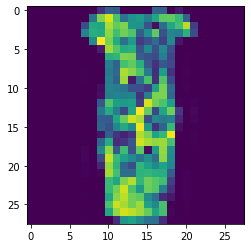

In [66]:
plt.figure()
plt.imshow(np.squeeze(test_images[100]))

We can verify that the model has predicted the test image at index 100 correctly as dress and the label is predicted correspondingly as 3